# Computational tools to develop enciphered poems

This post provides functions and interactive tools that help with the writing of enciphered poetry. These are poems where each letter has a complementary pairing that allows the sentence to the read using either key. For example, if .... then the following poem can be read as either:

> Hello
> 
> World

Because an enciphered dictionary is generated from a combinatorial process, it is a perfect application for computational support. The rest is outlined as follows: (1) gives a background of the constrained poetry movement, (2) shows how to use `python` to create the necessary support functions to determine all possible encipherment possiblities and corresponding (valid) vocaulary, (3) provides a template to create an interactive tool hosted on `dash`, and (4) concludes. 

After I finished this post I realized that the [Peterson and Fyshe (2016)](http://www.langlearnlab.cs.uvic.ca/beamverse) had already undertaking an almost identical exercise! Their work is much more academic however and uses a [beam search](https://en.wikipedia.org/wiki/Beam_search) approach to explore the combinatorial space. This post can be thought of a slightly less technical analysis with code that can be run within a single jupyter notebook environment. 

The code in this post is selectively highlighted. To see the entire repo and code needed to host [final website](https://mighty-lake-42932.herokuapp.com/), see [this repo](github.com:ErikinBC/mirror_alphabet).

# (1) The use of constraints in poetry

Constraints in poetry are as old as the artform itself. Rhyme schemes, meter, and poetic forms (e.g. sonnets) all impose constraints on what words can be used in what order. Yet far from limiting the expressive capacity of poetry, constraints often help to bring out what is most beautiful in human language. The constraint most associated with poetry is rhyming. In the late Victorian era, poets [Tennyson](https://en.wikipedia.org/wiki/Alfred,_Lord_Tennyson) had perfected this mellifluous technique:

> By the margin, willow-veil'd,
>
> Slide the heavy barges trail'd
>
> By slow horses; an unhail'd
>
> The shallop flitteth silken-sail'd
>
> Skimming down to Camelot
>
> ...
> 
> [The Lady of Shallot](https://www.poetryfoundation.org/poems/45360/the-lady-of-shalott-1842)

Though the mellifluous feel of Victorian-era poetry could sometime be overwrought, it demonstrates that the rhyming constraint can be a necessary condition to achieving a certain feel in a poem. [Modernist](https://en.wikipedia.org/wiki/Modernist_poetry_in_English) poets like TS Eliot and Ezra Pound moved away from what Milton presciently referred to as the "the jingling sound of like endings" to a more fluid and unstructured type of poetry. The poetic world has rarely looked back. Consider the most popular book of poetry (by far) in the 21st century: Rupi Kaur's *milk and honey*. The book is full of beautiful and sparse poetry, yet it has very little rigid structure, and instead is shaped (literally) by the emotional cadence of the sexual trauma the book is based on. 

Like Newton's third law, all changes in artistic direction are eventually met with a counter-reaction. The [Oulipo movement](https://en.wikipedia.org/wiki/Oulipo) which began in the 1960s attempted to explore the limits of what art could still be produced under increasingly rigorous restrictions. Made up of mainly French-speaking writers and mathematicians, Oulipo were described as "rats who construct the labyrinth from which they plan to escape." For example, [Perec's](https://en.wikipedia.org/wiki/Georges_Perec) *La Disparition* was a novel written without the letter *e* (i.e. a lipogram). 

Today, there are a small number of contemporary poets whose artistic *oeuvre* is centered around constraint-based poetry. This includes the likes of [Christian Bök](https://www.umlautmachine.net/), [Anthony Etherin](https://anthonyetherin.wordpress.com/), and [Luke Bradford](http://lukebradford.xyz/). These (mainly male) tend to be interested in science and make use of computational tools explore the edge cases of poetic constraints.[[^1]] Below are some poetic examples from each poet using three different constraint-based techniques: tetragrams, [univocalics](https://en.wikipedia.org/wiki/Univocalic), and [anagrams](https://en.wikipedia.org/wiki/Anagram).

**Luke Bradford**
> She's aged well past what rock lies near that seat; 
> 
> Like some Myth,
> 
> She's been dead many eons; 
> 
> She's seen what amid that long dark lies;
>
> ...
> 
> [Mona Lisa](http://lukebradford.xyz/Mona%20Lisa.pdf) (Tetragrams)

**Christian Bök**
> Enfettered, these sentences rpress free speech. The text deletes selected letters. We see the revered exegete reject metred verse: the sestet, the tercet...
>
> ...
> 
> [Euonia](https://www.poetryinternational.org/pi/poem/29326/auto/0/0/Christian-Bok/From-Chapter-E/en/tile) (Chapter E)

**Anthony Etherin**
> I wandered lonely as a cloud...
> 
> All law worn. I seduced an ode,
> 
> a lucid yarn so seed allowed...
>
> ...
> 
> [For Wordsworth](https://derekbeaulieu.files.wordpress.com/2017/08/five_romantics_in_firm_octaves.pdf) (Anagram)


Though the constraint-based poets today know they are a niche group within a niche art form, their artistic stance actually represents an ongoing debate in poetry for the last 200 years between the [egotistical sublime](https://www.tandfonline.com/doi/abs/10.1080/00138386808597305?journalCode=nest20) and [negative capability](https://en.wikipedia.org/wiki/Negative_capability).[[^2]] The former views the job of the poet to provide a confessional outpouring of feeling; an inner monologue of thoughts and experiences. The latter believes that the poet is merely an instrument which channels other forces to speak through them; treating language as an alien form to engineer it for human purposes. Most contemporary poets subscribe to the philosophy of the egotistical sublime.

For poets like Bök, this obsession of internal reflection and expression, while appropriate in some measure, has consumed contemporary poetic culture to an [unhealthy degree](https://arts.mit.edu/poetry-survive-end-civilization/).

> I think the greatest way to impugn poetry is simply to note that even though humans have set foot on the moon, there is no canonical poem about that moment. And you can bet that if the ancient Greeks had ridden a trireme to the moon, there would be a 12-volume epic poem about that grandiose adventure.


To a casual reader of poetry, the first encounter with a constraint-based poem will often produce a satisfying feel generated from the "cool" effect of the aesthetic. Until one has read Bök's *Eunoia*, no English speaker can truly appreciate the personality of each vowel. Only be constraining ourselves do we learn that *e* is regal and languid, *i* is shrill and staccato, *u* is guttural and dirty, etc.

MENTION [lipogram](https://en.wikipedia.org/wiki/Lipogram) HERE

# (2) Enciphered poems

A wonderful constraint-based poetic form is that of the enciphered poem. When a set of letters are given a complementary pairing, a poem can now be read in two different ways depending on which key is being used. Here is an example of a (rather cryptic) poem I wrote using a total of 12 letters and 6 pairs.

> An ID acts, he roots
> 
> Id, an itch so leech
> 
> e:o, t:c, a:i, s:h, n:d, r:l

In cryptography this is known as a [substitution cipher](https://en.wikipedia.org/wiki/Substitution_cipher). The idea of complementary pairings is of course the foundational structure of all biological life: DNA. All genetic code is made up of one of four neucleotides: (A), (C), (G), (T), with a complentary pairing structure of A:C and G:T. This means that a sequence of the neucleotides ACGT is informationally identical to CATG. DNA is double-stranded, meaning that DNA found in every cell is "zipped-up" along a complementary pattern: $\frac{ACGT...}{CATG...}$. While natural languages and genetic languages both have "letters", they are used in slightly different ways. In human language, a certain combination of letters forms a word, and a certain order of words forms a sentence. In DNA, different triplets of nucleotides forms a codon, and a certain order of codons forms a gene.[[^3]] 

The most exciting (and ongoing) enciphered poem using DNA is Christian Bok's Xenotext project. By assigning each codon a letter, the corresponding transcription can be read in one of two ways. While the project has been successfully implemented using a simple bacteria, the goal is to have the poem embedded in the extremophile organism [*Deinococcus radiodurans*](https://en.wikipedia.org/wiki/Deinococcus_radiodurans). These organisms are effectively immortal due to their incredible genetic repair mechanisms.


## References

[^1]: All of these poets are published by Penteract Press.

[^2]: For a fuller discussion on this, see a [conversation between](https://bioeconometrician.github.io/bok_interview/) Christian Bök and Anthony Etherin on the subject.

[^3]: This is of course a simplication of both natural language and genetics, but I am trying to make the two sytems as simple as possible. 

Before writing an enciphered poem one needs to decide the dictionary of eligible words and which letters to use. For example Webster's dictionary has over 470K English words, although many of these are proper nouns like Athens or archaic words lime crumpet. Yet even these dictionaries will lack many technical words used in specific disciplines. An appropriate choice of dictionary is important for writing different styles of poems. Enciphered poems can be subject to a further lipogrammatic constraint discussed in section (1).  

For a given choice of $k$ even-numbered letters there are a total of $\prod_{i=1}^{k/2} (2i-1)$ possible ciphers. For example if you had four letters (a,b,c,d), then a total of 3 unique enciphers exist: (i) a:b, c:d, (ii) a:c, b:d, (iii) a:d, b:c. Because the encipher is complementary, the a:b is the same as b:a (in this sense it is akin to combination rather than a permutation). 

How did we get this specific formula you may ask? Imagine you are going to pick a cipher based on 4 letters. After picking an initial letter, there are three choices you can make. After these first two letters are paired, you pick another letter. There is only one way to pair it. Hence three times one equals three combinations. Why are we counting a choice only after a letter has been picked? The reason is the complementarity of the letter. If you have two letters, it doesn't matter if you pick the first one and then second one, or vice versa. Hence, the only real "choice" is after a letter has been selected.

In addition to the number of ways $k$ letters can be paired, there are $26 \choose k$ possible sets of letters for a given lipogrammatic encipher. The first code block below will use a simple function to show how many possible encodings can exist for a given number of letters.

In [2]:
# Load modules needed for rest of post
import os
import io
import nltk
import string
import contextlib
import numpy as np
import pandas as pd
import plotnine as pn
from scipy.special import comb
import spacy
nlp_sm = spacy.load('en_core_web_sm')

from funs_support import makeifnot

letters = [l for l in string.ascii_lowercase]

def n_encipher(n_letters):
    assert n_letters % 2 == 0, 'n_letters is not even'
    n1 = int(np.prod(np.arange(1,n_letters,2)))
    n2 = int(comb(26, n_letters))
    n_tot = n1 * n2
    res = pd.DataFrame({'n_letter':n_letters,'n_encipher':n1, 'n_lipogram':n2, 'n_total':n_tot},index=[0])
    return res

n_letter_seq = np.arange(2,26+1,2).astype(int)
holder = []
for n_letter in n_letter_seq:
    holder.append(n_encipher(n_letter))
df_ncomb = pd.concat(holder).reset_index(drop=True)
df_ncomb.style.format("{:,}")

,n_letter,n_encipher,n_lipogram,n_total
0,2,1,325,325
1,4,3,"14,950","44,850"
2,6,15,"230,230","3,453,450"
3,8,105,"1,562,275","164,038,875"
4,10,945,"5,311,735","5,019,589,575"
5,12,"10,395","9,657,700","100,391,791,500"
6,14,"135,135","9,657,700","1,305,093,289,500"
7,16,"2,027,025","5,311,735","10,767,019,638,375"
8,18,"34,459,425","1,562,275","53,835,098,191,875"
9,20,"654,729,075","230,230","150,738,274,937,250"


Using all 26 letters of the Roman alphabet, Table 1 shows that there are almost 8 trillion possible ways the create complementary pairings for 26 letters. However, there are more than 205 trillion possible lipogrammatic enciphers when using 22 letters of the English alphabet because there is 13 billion possible pairings with a futher 15 thousand possible sets of 22 letters. Even using only 6 letters there will be more than 3 million possible lipogrammatic enciphers. 

To provide actual examples of enciphered dictionaries I'm going to use a [simple English dictionary](http://www.mieliestronk.com/wordlist.html) of English words. This will also be combined with data on the empirical distribution of [1-word n-grams](https://norvig.com/ngrams/) to help weight the quality of different dictionaries.

In [3]:
dir_code = os.getcwd()
dir_data = os.path.join(dir_code, '..', 'data')
makeifnot(dir_data)
dir_output = os.path.join(dir_code, '..', 'output')
makeifnot(dir_output)

path_ngram = os.path.join(dir_data,'words_ngram.txt')
if not os.path.exists(path_ngram):
    os.system('wget -q -O %s/words_ngram.txt https://norvig.com/ngrams/count_1w.txt' % path_ngram)

path_words = os.path.join(dir_data,'words_corncob.txt')
if not os.path.exists(path_words):
    print('Downloading')
    os.system('wget -q -O %s/words_corncob.txt http://www.mieliestronk.com/corncob_lowercase.txt' % path_words)
    
# (1) Load the Ngrams
df_ngram = pd.read_csv(path_ngram,sep='\t',header=None).rename(columns={0:'word',1:'n'})
df_ngram = df_ngram[~df_ngram['word'].isnull()].reset_index(drop=True)

# (2) Load the short word set
df_words = pd.read_csv(path_words,sep='\n',header=None).rename(columns={0:'word'})
df_words = df_words[~df_words['word'].isnull()].reset_index(drop=True)

# Overlap?
n_overlap = df_words.word.isin(df_ngram['word']).sum()
print('A total of %i short words overlap (out of %i)' % (n_overlap, df_words.shape[0]))

# Merge datasets in the intersection
df_merge = df_ngram.merge(df_words,'inner','word')
df_merge = df_merge.assign(n_sqrt=lambda x: np.sqrt(x['n']), n_log=lambda x: np.log(x['n']))

A total of 51886 short words overlap (out of 58109)


We can see that there is an 89% overlap between the words in the dictionary and the word usage data that was downloaded. Next, we can add on the different parts of the speech such as nouns, adverbs, etc.

In [4]:
# Capture print outupt
def capture(fun,arg):
    f = io.StringIO()
    with contextlib.redirect_stdout(f):
        fun(arg)
    output = f.getvalue()
    return output

# Add on the parts of speech
pos_lst = [z[1] for z in nltk.pos_tag(df_merge['word'].to_list())]
df_merge.insert(1,'pos',pos_lst)
# Get PoS defintions
pos_def = pd.Series([capture(nltk.help.upenn_tagset,p) for p in df_merge['pos'].unique()])
pos_def = pos_def.str.split('\\:\\s|\\n',expand=True,n=3).iloc[:,:2]
pos_def.rename(columns={0:'pos',1:'def'},inplace=True)
df_merge = df_merge.merge(pos_def, 'left', 'pos')

    
print('The ten most and least common words in the dictionary')
pd.concat([df_merge.head(10)[['word','n']].reset_index(None,True),
           df_merge.tail(10)[['word','n']].reset_index(None,True)],1)

The ten most and least common words in the dictionary


,word,n,word,n
0,the,23135851162,offcuts,12748
1,of,13151942776,hinderer,12737
2,and,12997637966,eminences,12734
3,to,12136980858,vaporisation,12732
4,in,8469404971,expurgated,12732
5,for,5933321709,concussed,12732
6,is,4705743816,griever,12729
7,on,3750423199,sibilance,12720
8,that,3400031103,synchronises,12719
9,by,3350048871,insatiably,12717


Let's take a look at the empirical distribution of word usage for our dictionary of around 52K words. Figure 1 below shows that the distribution is highly skewed to the right. Words like "the", "of", "and" are used thousands of times more frequently than even the even a fairly common word. Notice that even the log-transformation of word usage is polynomial suggesting word usage is doubly-exponential! 

Word usage frequencies help to weight the final quality of the enciphered dictionary. For example, one dictionary might have 50 words that are frequently used in English, whilst another might have 100 that are rarely used. By weighting the total number of words, we might come to a different conclusion about which is the "preferred" dictionary in terms of the quality of word choices to build poems from. Note that if the weights are the log-transformed count of frequencies this weighting will be more favourable to dictionaries with more words, whilst using the actual count will favour any dictionaries that has one or more top words. 

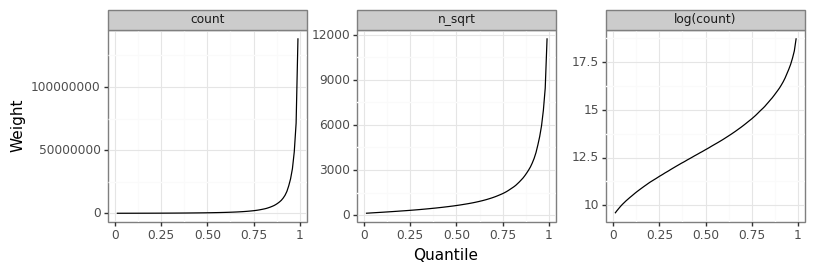

<ggplot: (8786910662577)>

In [9]:
# Examine the score frequency by percentiles
p_seq = np.arange(0.01,1,0.01)
dat_n_q = df_merge.melt('word',['n','n_sqrt','n_log'],'tt')
dat_n_q = dat_n_q.groupby('tt').value.quantile(p_seq).reset_index()
dat_n_q.rename(columns={'level_1':'qq'}, inplace=True)
dat_n_q.tt = pd.Categorical(dat_n_q.tt,['n','n_sqrt','n_log'])
di_tt = {'n':'count', 'sqrt(count)':'sqrt','n_log':'log(count)'}

# DISTIRUBTION OF WORD FREQUENCIES
pn.options.figure_size = (9, 2.5)
gg_q = (pn.ggplot(dat_n_q, pn.aes(x='qq',y='value')) + pn.geom_path() +
       pn.theme_bw() + pn.labs(y='Weight', x='Quantile') +
       pn.facet_wrap('~tt',scales='free_y',labeller=pn.labeller(tt=di_tt)) +
       pn.theme(subplots_adjust={'wspace': 0.25}))
gg_q

For a lipogrammatic encipher, we may want to focus on letters that show up most commonly in the English language. According to our dictionary the top-12 letters are: e, t, o, a, i, s, n, r, l, c, h, d.

In [10]:
letter_freq = df_merge[['word','n']].apply(lambda x: list(x.word),1).reset_index().explode(0)
letter_freq.rename(columns={0:'letter','index':'idx'}, inplace=True)
letter_freq_n = letter_freq.merge(df_merge.rename_axis('idx').n.reset_index()).groupby('letter').n.sum().reset_index()
letter_freq_n = letter_freq_n.sort_values('n',ascending=False).reset_index(None,True)
print(letter_freq_n.head(12))

   letter             n
0       e  312191856406
1       t  225437874527
2       o  201398083835
3       a  198476530159
4       i  192368122407
5       s  181243649705
6       n  179959338059
7       r  176716148797
8       l  109383119821
9       c   96701494588
10      h   95559527823
11      d   93460670221


# (3) Computational tools to support enciphered poems

Recall there are two combinations we are interested after the lipogram of interest is decided:

1. The $26 \choose k$ possible ways to select $k$ even-numbered letters
2. The $\prod_{i=1}^{k/2} (2i-1)=1\cdot 3 \cdot \dots \cdot (k-1)$ possible ways to make an encipherment through the complementary letter pairing

There are three practical computational questions that need to be answered. First, after choosing the number of letters ($k$), how do we iterate through all possible combinations in a deterministic way? Second, for a given set of actual letters (e.g. *etoaisnrlchd*), how to do we iterate through all possible pairings in a deterministic way? Lastly, after the alphabet and pairing has been decided (e.g. a:s, h:o), how can we determine which words are valid for encipherment? The `enciphered_dict` class below provides convenient wrappers for each of these three questions. 

A few notes about the methods of the class to better understand what it is doing. First, the class needs to be initialized with a DataFrame `df_english` and an index of which column has the words `cn_word`. Second, the choice of letters needs to be set with `set_letters`. 


In [27]:
"""
df_english:         A DataFrame with a column of words (and other annotations)
cn_word:            Column name in df_english with the English words
letters:            A string of letters (e.g. "abqz")
n_letters:          If letters is None, how many letters to pick from
idx_letters:        If letters is None, which combination index to pick from
"""
class encipherer():
    def __init__(self, df_english, cn_word):
        assert isinstance(df_english, pd.DataFrame), 'df_english needs to be a DataFrame'
        self.df_english = df_english.rename(columns={cn_word:'word'}).drop_duplicates()
        assert not self.df_english['word'].duplicated().any(), 'Duplicate words found'
        self.df_english['word'] = self.df_english['word'].str.lower()
        self.latin = string.ascii_lowercase
        self.n = len(self.latin)

    """
    After class has been initialized, letters must be chosen. This can be done by either manually specifying the letters, or picking from (26 n_letters)

    letters:        String (e.g. 'aBcd')
    n_letters:      Number of letters to use (must be ≤ 26)
    idx_letters:    When letters is not specified, which of the combination indices to use from (n C k) choices
    """
    def set_letters(self, letters=None, n_letters=None, idx_letters=None):
        if letters is not None:
            assert isinstance(letters, str), 'Letters needs to be a string'
            self.letters = pd.Series([letter.lower() for letter in letters])
            self.letters = self.letters.drop_duplicates()
            self.letters = self.letters.sort_values().reset_index(drop=True)
            self.n_letters = self.letters.shape[0]
            self.idx_max = {k:v[0] for k,v, in self.n_encipher(self.n_letters).to_dict().items()}
        else:
            has_n = n_letters is not None
            has_idx = idx_letters is not None
            assert has_n and has_idx, 'If letters is None, n_letters and idx_letters must be provided'
            self.idx_max = {k:v[0] for k,v, in self.n_encipher(n_letters).to_dict().items()}
            assert idx_letters <= self.idx_max['n_lipogram'], 'idx_letters must be ≤ %i' % self.idx_max['n_lipogram']
            assert idx_letters > 0, 'idx_letters must be > 0'
            self.n_letters = n_letters
            tmp_idx = self.get_comb_idx(idx_letters, self.n, self.n_letters)
            self.letters = pd.Series([self.latin[idx-1] for idx in tmp_idx])
            self.letters = self.letters.sort_values().reset_index(drop=True)
        assert self.n_letters % 2 == 0, 'n_letters must be an even number'
        assert self.n_letters <= self.n, 'n_letters must be ≤ %i' % self.n
        self.k = int(self.n_letters/2)
        
    
    """
    After letters have been set, either specify mapping or pick from an index

    pairing:        String specifying pairing order (e.g. 'a:e, i:o')
    idx_pairing:    If the pairing is not provided, pick one of the 1 to n_encipher possible permutations
    """
    def set_encipher(self, pairing=None, idx_pairing=None):
        if pairing is not None:
            assert isinstance(pairing, str), 'pairing needs to be a string'
            lst_pairing = pairing.replace(' ','').split(',')
            self.mat_pairing = np.array([pair.split(':') for pair in lst_pairing])
            assert self.k == self.mat_pairing.shape[0], 'number of rows does not equal k: %i' % self.k
            assert self.mat_pairing.shape[1] == 2, 'mat_pairing does not have 2 columns'
            tmp_letters = self.mat_pairing.flatten()
            n_tmp = len(tmp_letters)
            assert n_tmp == self.n_letters, 'The pairing list does not match number of letters: %i to %i' % (n_tmp, self.n_letters)
            lst_miss = np.setdiff1d(self.letters, tmp_letters)
            assert len(lst_miss) == 0, 'pairing does not have these letters: %s' % lst_miss
        else:
            assert idx_pairing > 0, 'idx_pairing must be > 0'
            assert idx_pairing <= self.idx_max['n_encipher'], 'idx_pairing must be ≤ %i' % self.idx_max['n_encipher']
            # Apply determinstic formula
            self.mat_pairing = self.get_encipher_idx(idx_pairing)
        # Pre-calculated values for alpha_trans() method
        s1 = ''.join(self.mat_pairing[:,0])
        s2 = ''.join(self.mat_pairing[:,1])
        self.trans = str.maketrans(s1+s2, s2+s1)
        self.str_pairing = pd.DataFrame(self.mat_pairing)
        self.str_pairing = ','.join(self.str_pairing.apply(lambda x: x[0]+':'+x[1],1))


    """
    Find enciphered corpus
    """
    def get_corpus(self):
        words = self.df_english['word']
        # Remove words that have a letter outside of the lipogram
        regex_lipo = '[^%s]' % ''.join(self.letters)
        words = words[~words.str.contains(regex_lipo)].reset_index(drop=True)
        words_trans = self.alpha_trans(words)
        idx_match = words.isin(words_trans)
        tmp1 = words[idx_match]
        tmp2 = words_trans[idx_match]
        self.df_encipher = pd.DataFrame({'word':tmp1,'mirror':tmp2})
        self.df_encipher.reset_index(drop=True,inplace=True)
        # Add on any other columns from the original dataframe
        self.df_encipher = self.df_encipher.merge(self.df_english)

        """
    Iterate through all possible cipher combinations

    cn_weight:          A column from df_english that has a numerical score
    set_best:           Should the highest scoring index be set for idx_pairing?
    """
    def score_ciphers(self, cn_weight, set_best=True):
        cn_dtype = self.df_english.dtypes[cn_weight]
        assert (cn_dtype == float) | (cn_dtype == int), 'cn_weight needs to be a float/int not %s' % cn_dtype
        n_encipher = self.idx_max['n_encipher']
        holder = np.zeros([n_encipher,2])
        for i in range(1, n_encipher+1):
            self.set_encipher(idx_pairing=i)
            self.get_corpus()
            n_i = self.df_encipher.shape[0]
            w_i = self.df_encipher[cn_weight].sum()
            holder[i-1] = [n_i, w_i]
        # Get the rank
        self.df_score = pd.DataFrame(holder,columns=['n_word','weight'])
        self.df_score['n_word'] = self.df_score['n_word'].astype(int)
        self.df_score = self.df_score.rename_axis('idx').reset_index()
        self.df_score['idx'] += 1
        self.df_score = self.df_score.sort_values('weight',ascending=False).reset_index(drop=True)
        if set_best:
            self.set_encipher(idx_pairing=self.df_score['idx'][0])
            self.get_corpus()
        
    """
    Deterministically returns encipher
    """
    def get_encipher_idx(self, idx):
        j = 0
        lst = self.letters.to_list()
        holder = np.repeat('1',self.n_letters).reshape([self.k, 2])
        for i in list(range(self.n_letters-1,0,-2)):
            l1 = lst[0]
            q, r = divmod(idx, i)
            r += 1
            l2 = lst[r]
            lst.remove(l1)
            lst.remove(l2)
            holder[j] = [l1, l2]
            j += 1
            idx = q
        return holder

    """
    Deterministically return (n C k) indices
    """
    @staticmethod
    def get_comb_idx(idx, n, k):
        c, r, j = [], idx, 0
        for s in range(1,k+1):
            cs = j+1
            while r-comb(n-cs,k-s)>0:
                r -= comb(n-cs,k-s)
                cs += 1
            c.append(cs)
            j = cs
        return c

    """
    Uses mat_pairing to translate the strings

    txt:        Any string or Series
    """
    def alpha_trans(self, txt):
        if not isinstance(txt, pd.Series):
            txt = pd.Series(txt)
        z = txt.str.translate(self.trans)
        return z

    """
    Function to calculate total number lipogrammatic and enciphering combinations
    """
    @staticmethod
    def n_encipher(n_letters):
        assert n_letters % 2 == 0, 'n_letters is not even'
        n1 = int(np.prod(np.arange(1,n_letters,2)))
        n2 = int(comb(26, n_letters))
        n_tot = n1 * n2
        res = pd.DataFrame({'n_letter':n_letters,'n_encipher':n1, 'n_lipogram':n2, 'n_total':n_tot},index=[0])
        return res

As a quick sanity check, let's make sure that `set_letters` actually gets all the $n \choose 4$=14950 combinations we'd expect from using a subset of 4 letters. 

In [14]:
enc = encipherer(df_merge, 'word')
n_lipogram = enc.n_encipher(n_letters=4)['n_lipogram'][0]

# (i) Enumerate through all possible letter pairings
holder = []
for i in range(1, n_lipogram+1):
    enc.set_letters(n_letters=4, idx_letters=i)
    holder.append(enc.letters)
df_letters = pd.DataFrame(holder)
df_letters.columns = ['l'+str(i+1) for i in range(4)]
assert not df_letters.duplicated().any()  # Check that no duplicate values
df_letters

,l1,l2,l3,l4
0,a,b,c,d
1,a,b,c,e
2,a,b,c,f
3,a,b,c,g
4,a,b,c,h
...,...,...,...,...
14945,v,w,x,y
14946,v,w,x,z
14947,v,w,y,z
14948,v,x,y,z


That looks right! Let's repeat this exercise for 12 letters (a to l) and make sure we can iterate through all $\prod_{i=1}^{6} (2i-1)=10395$ unique ciphers.

In [16]:
enc = encipherer(df_merge, 'word')
enc.set_letters(n_letters=12, idx_letters=1)
n_encipher = enc.n_encipher(enc.n_letters)['n_encipher'][0]

holder = []
for i in range(1, n_encipher+1):
    enc.set_encipher(idx_pairing=i)
    holder.append(enc.mat_pairing.flatten())
df_encipher = pd.DataFrame(holder)
idx_even = df_encipher.columns % 2 == 0
tmp1 = df_encipher.loc[:,idx_even]
tmp2 = df_encipher.loc[:,~idx_even]
tmp2.columns = tmp1.columns
df_encipher = tmp1 + ':' + tmp2
df_encipher.columns = ['sub'+str(i+1) for i in range(6)]
assert not df_encipher.duplicated().any()  # Check that no duplicate values
df_encipher

,sub1,sub2,sub3,sub4,sub5,sub6
0,a:c,b:d,e:f,g:h,i:j,k:l
1,a:d,b:c,e:f,g:h,i:j,k:l
2,a:e,b:c,d:f,g:h,i:j,k:l
3,a:f,b:c,d:e,g:h,i:j,k:l
4,a:g,b:c,d:e,f:h,i:j,k:l
...,...,...,...,...,...,...
10390,a:i,b:l,c:k,d:j,e:h,f:g
10391,a:j,b:l,c:k,d:i,e:h,f:g
10392,a:k,b:l,c:j,d:i,e:h,f:g
10393,a:l,b:k,c:j,d:i,e:h,f:g


For a given letter set and pairing, we can then simply call the 

In [23]:
pd.set_option('display.max_rows', 10)
enc = encipherer(df_merge, 'word')
enc.set_letters(letters='etoaisnrlchd')
enc.set_encipher(idx_pairing=1)
enc.get_corpus()
print(enc.df_encipher[['word','mirror','pos','def']])
print('Character mapping: %s' % enc.str_pairing)

    word mirror  pos                                           def
0    the    sic   DT                                    determiner
1    are    doc  VBP  verb, present tense, not 3rd person singular
2    she    tic  PRP                             pronoun, personal
3    did    aha  VBD                              verb, past tense
4     id     ha   NN                noun, common, singular or mass
..   ...    ...  ...                                           ...
21   coo    err   JJ                 adjective or numeral, ordinal
22  trad   soda   NN                noun, common, singular or mass
23  cots   erst  NNS                          noun, common, plural
24  erst   cots   JJ                 adjective or numeral, ordinal
25  teds   scat  NNS                          noun, common, plural

[26 rows x 4 columns]
Character mapping: a:d,c:e,h:i,l:n,o:r,s:t


Great, now we are ready to explore the quality of different ciphers by evaluating the quality of a given enciphered dictionary by weighting the total number of words by the measure of word frequency. Note that the code block below will likely take 5-10 minutes to run depending on the computer you are using.

In [28]:
enc = encipherer(df_merge, 'word')
enc.set_letters(letters='etoaisnrlchd')
enc.score_ciphers(cn_weight='n_log',set_best=True)
enc.df_score

,idx,n_word,weight
0,917,132,2092.352597
1,8936,110,1797.185035
2,8705,108,1728.976614
3,818,108,1709.790184
4,8958,104,1678.618592
...,...,...,...
10390,7302,6,99.883288
10391,7401,6,99.883288
10392,3710,6,98.803354
10393,5263,6,97.714499


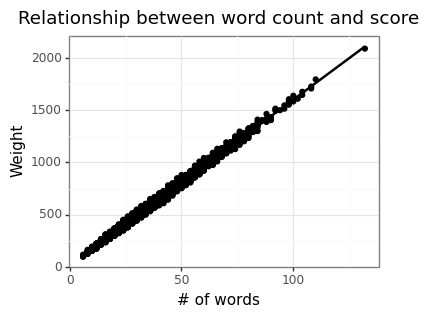

<ggplot: (8786909668673)>

In [37]:
pn.options.figure_size = (4, 3)
(pn.ggplot(enc.df_score, pn.aes(x='n_word',y='weight')) + 
    pn.theme_bw() + pn.geom_point() + 
    pn.ggtitle('Relationship between word count and score') + 
    pn.geom_smooth(method='lm',se=False) + 
    pn.labs(y='Weight', x='# of words'))

The figure above shows that using the log of the word frequency leads to a very tight correlation between the number of words and the weighted value of the dictionary. 

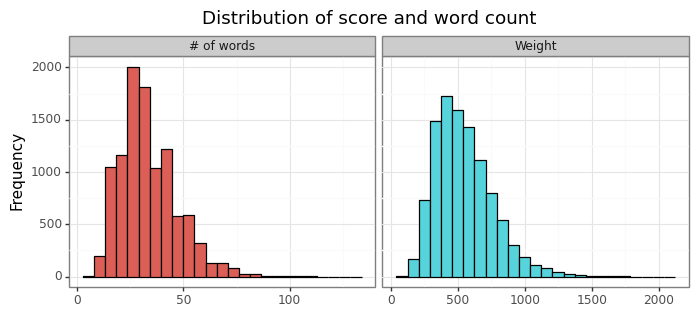

<ggplot: (8786909792125)>

In [35]:
long_score = enc.df_score.melt('idx',None,'metric')
di_metric = {'n_word':'# of words', 'weight':'Weight'}
pn.options.figure_size = (8, 3)
(pn.ggplot(long_score, pn.aes(x='value',fill='metric')) + 
    pn.theme_bw() + pn.guides(fill=False) + 
    pn.geom_histogram(bins=25,color='black') + 
    pn.ggtitle('Distribution of score and word count') + 
    pn.facet_wrap('~metric',labeller=pn.labeller(metric=di_metric),scales='free_x') + 
    pn.theme(axis_title_x=pn.element_blank()) + 
    pn.labs(y='Frequency'))

The figure above shows the distribution of the number of words which ranges from 6 to 132. As a reminder, this is only for the ciphers satisfying the 12-letter lipogrammatic constraint of *etoaisnrlchd*.

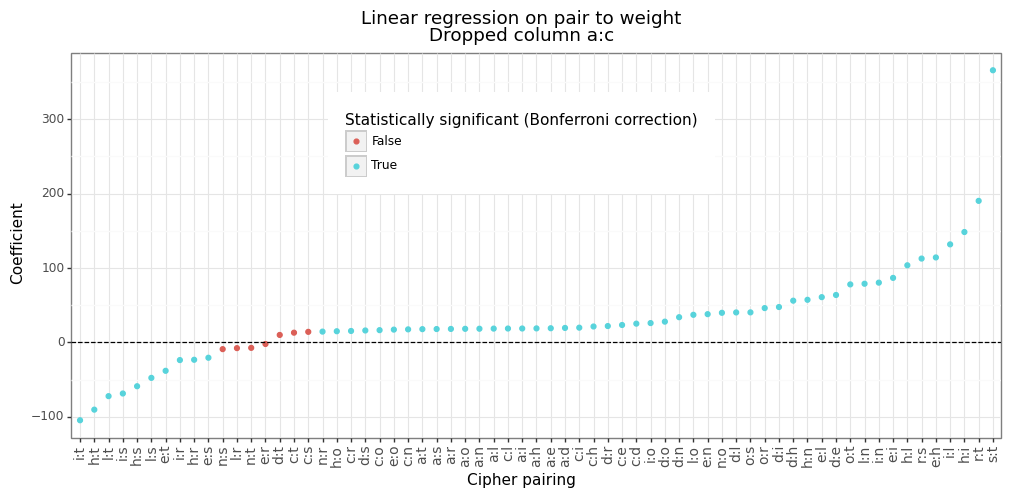

In [40]:
from IPython import display
display.Image("../figures/gg_ols.png", width=600, height=400)

## (4) Interactive app

Now that we have the ranking of different enciphered dictionaries, it would be nice to be able to host this on a website that allows for easier readability and artistic construction. To do, we'll first design a [dash app](https://plotly.com/dash/) and then deploy it on [heroku](https://www.heroku.com/). Unlike the previous sections, it is obviously impossible to actually have the output be displayed in a jupyter notebook, so while the code is hopefully information, for the entire repo needed to actually host the heroku app, please [go here](https://github.com/ErikinBC/bok12_heroku).